# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('data.csv')
labels = pd.read_csv('labels.csv', names=['labels'])

In [50]:
data.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0,600.0,NaN,20.0,480.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,82752.0,NaN,NaN,...,NaN,NESt0G8EIb,AERks4l,NaN,taul,1K8T,0LaQ,UaKK0yW,I1sFbv_0IT,NaN,NaN,EkHG,9_Y1,k13i,09_Q,IYzP,GjJ35utlTa_GNSvxxpb9ju,kIsH,NaN,uKAI,L84s,JBfYVit4g8,NaN,NaN,NaN,TDctq2l,KmRo,cJvF,FzaX,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,NaN,NaN,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212.0,265.0,NaN,2.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2706120.0,NaN,NaN,...,NaN,P1WvyxLp3Z,2Knk1KF,NaN,taul,1K8T,YFAj,Bnunsla,o64y9zI,DlISMzi,NaN,JDd6,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,I_mbgcr,NaN,XTbqizz,qMoY,cJvF,FzaX,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,NaN,NaN,448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0,220.0,NaN,0.0,72.0,NaN,NaN,311.76,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4698780.0,NaN,NaN,...,NaN,FoxgUHSK8h,LrdZy8QqgUfkVShG,NaN,taul,1K8T,TyGl,fhk21Ss,nQUveAzAF7,NaN,NaN,dnwD,9_Y1,mTeA,VpdQ,hAFG,7M47J5GA0pTYIFxg5uy,kIsH,NaN,uKAI,L84s,4kVnq_T26xq1p,NaN,NaN,NaN,pMWBUmQ,qLXr,UYBR,FzaX,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.0,415.0,NaN,0.0,144.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,864384.0,NaN,NaN,...,NaN,vNEvyxLp3Z,RO12,NaN,taul,1K8T,0Xwj,uoZk2Zj,LWyxgtXeJL,NaN,NaN,CwmB,F3hy,vzJD,VpdQ,IYzP,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJtVhC,JC0e,cJvF,FzaX,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,200.0,NaN,2.0,48.0,NaN,NaN,278.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4364880.0,NaN,NaN,...,NaN,4e7gUH7IEC,RO12,NaN,taul,1K8T,vSNn,kugYdIL,ZIXKpoNpqq,NaN,NaN,625Z,9_Y1,m_h1,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,NGZXfGp,064o,cJvF,FzaX,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [51]:
labels.head(5)

,labels
0,-1
1,-1
2,-1
3,1
4,-1


2\. Рассчитайте доли классов `отток` и `не отток`.

In [52]:
labels['labels'].value_counts()/labels.shape[0]

-1    0.9256
 1    0.0744
Name: labels, dtype: float64

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
numeric_data = data.iloc[:,:190]   
numeric_data['labels'] = labels
categorical_data = data.iloc[:,190:]   
categorical_data['labels'] = labels

In [0]:
temp = numeric_data[['Var'+str(180),'labels']].dropna()

In [0]:
# корреляция считается по формуле mean(feature(1))-mean(feature(-1)), 
# данная формула не учитывает масштаб признака, но интерпретируется лучше, чем корреляция Пирсона

def corrWithBin(df, name_feature, temp):
    values = temp.iloc[:,0]
    labels = temp.iloc[:,1]
    cor = 0
    mean_val_true = np.mean(values[labels == 1])
    mean_val_false = np.mean(values[labels == -1])
    count_val_true = len(values[labels==1])
    count_val_false = len(values[labels==-1])
    
    #считаем корреляцию только для признаков, в которых положительных классов больше 200
    if (mean_val_true == 0) | (mean_val_false==0) | (len(values[labels == 1])<200):
        corr = 0
    else:
        corr = abs(mean_val_true) - abs(mean_val_false)
        df.loc[len(correlations)] = [name_feature, abs(corr), count_val_true, count_val_false]
    return df

In [0]:
correlations = pd.DataFrame(columns = ['feature', 'corr', 'count 1', 'count -1'])
for i in range(len(numeric_data.loc[0,:])-1):       
    temp = numeric_data[['Var'+str(i+1),'labels']].dropna()
    correlations = corrWithBin(correlations,'Var'+ str(i+1), temp)

In [58]:
correlations = correlations.dropna()
correlations.sort_values(['corr'], ascending=False, inplace=True)
correlations.head()

,feature,corr,count 1,count -1
24,Var113,162842.184538,2976,37024
36,Var153,151453.351963,2789,33195
9,Var38,77671.003559,2789,33195
16,Var76,56780.681291,2789,33195
35,Var149,29536.673807,2575,31609


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

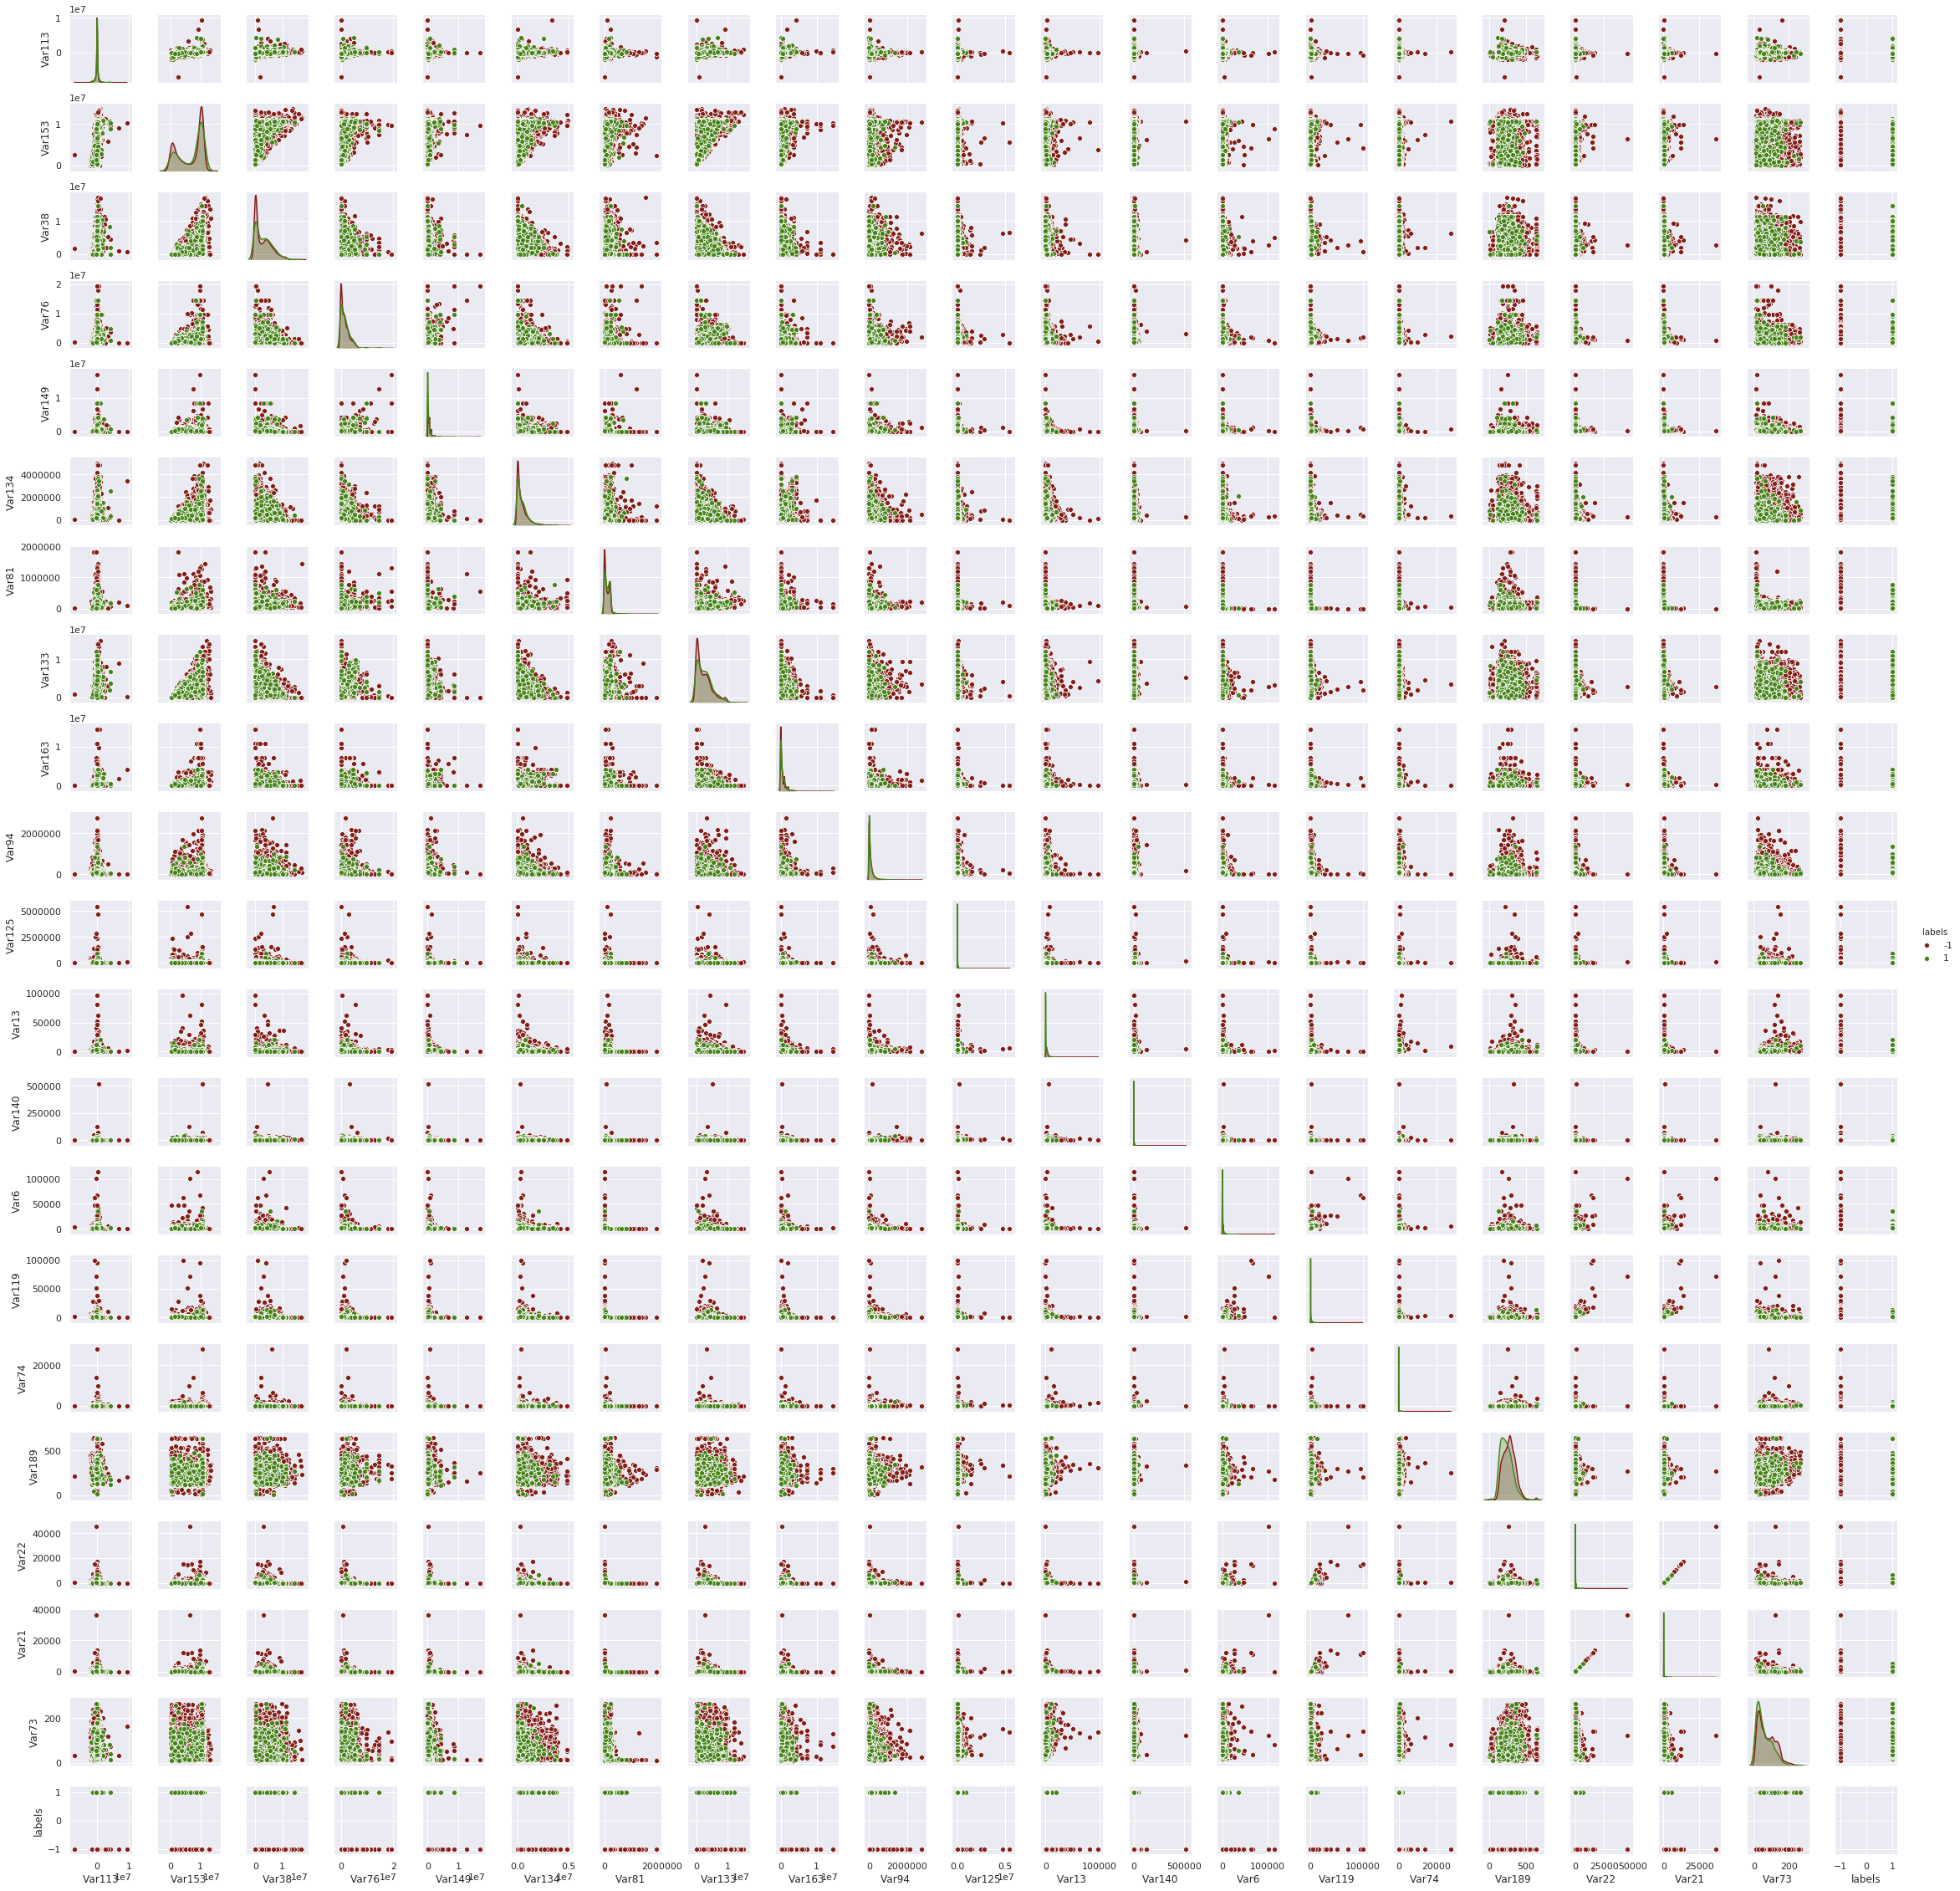

In [59]:
columns = correlations.feature.iloc[:20]
columns[len(columns)] = ("labels")
sns_plot = sns.pairplot(numeric_data[columns].dropna(), hue="labels",palette = sns.hls_palette(4, l=.3, s=.7), height=1.5)

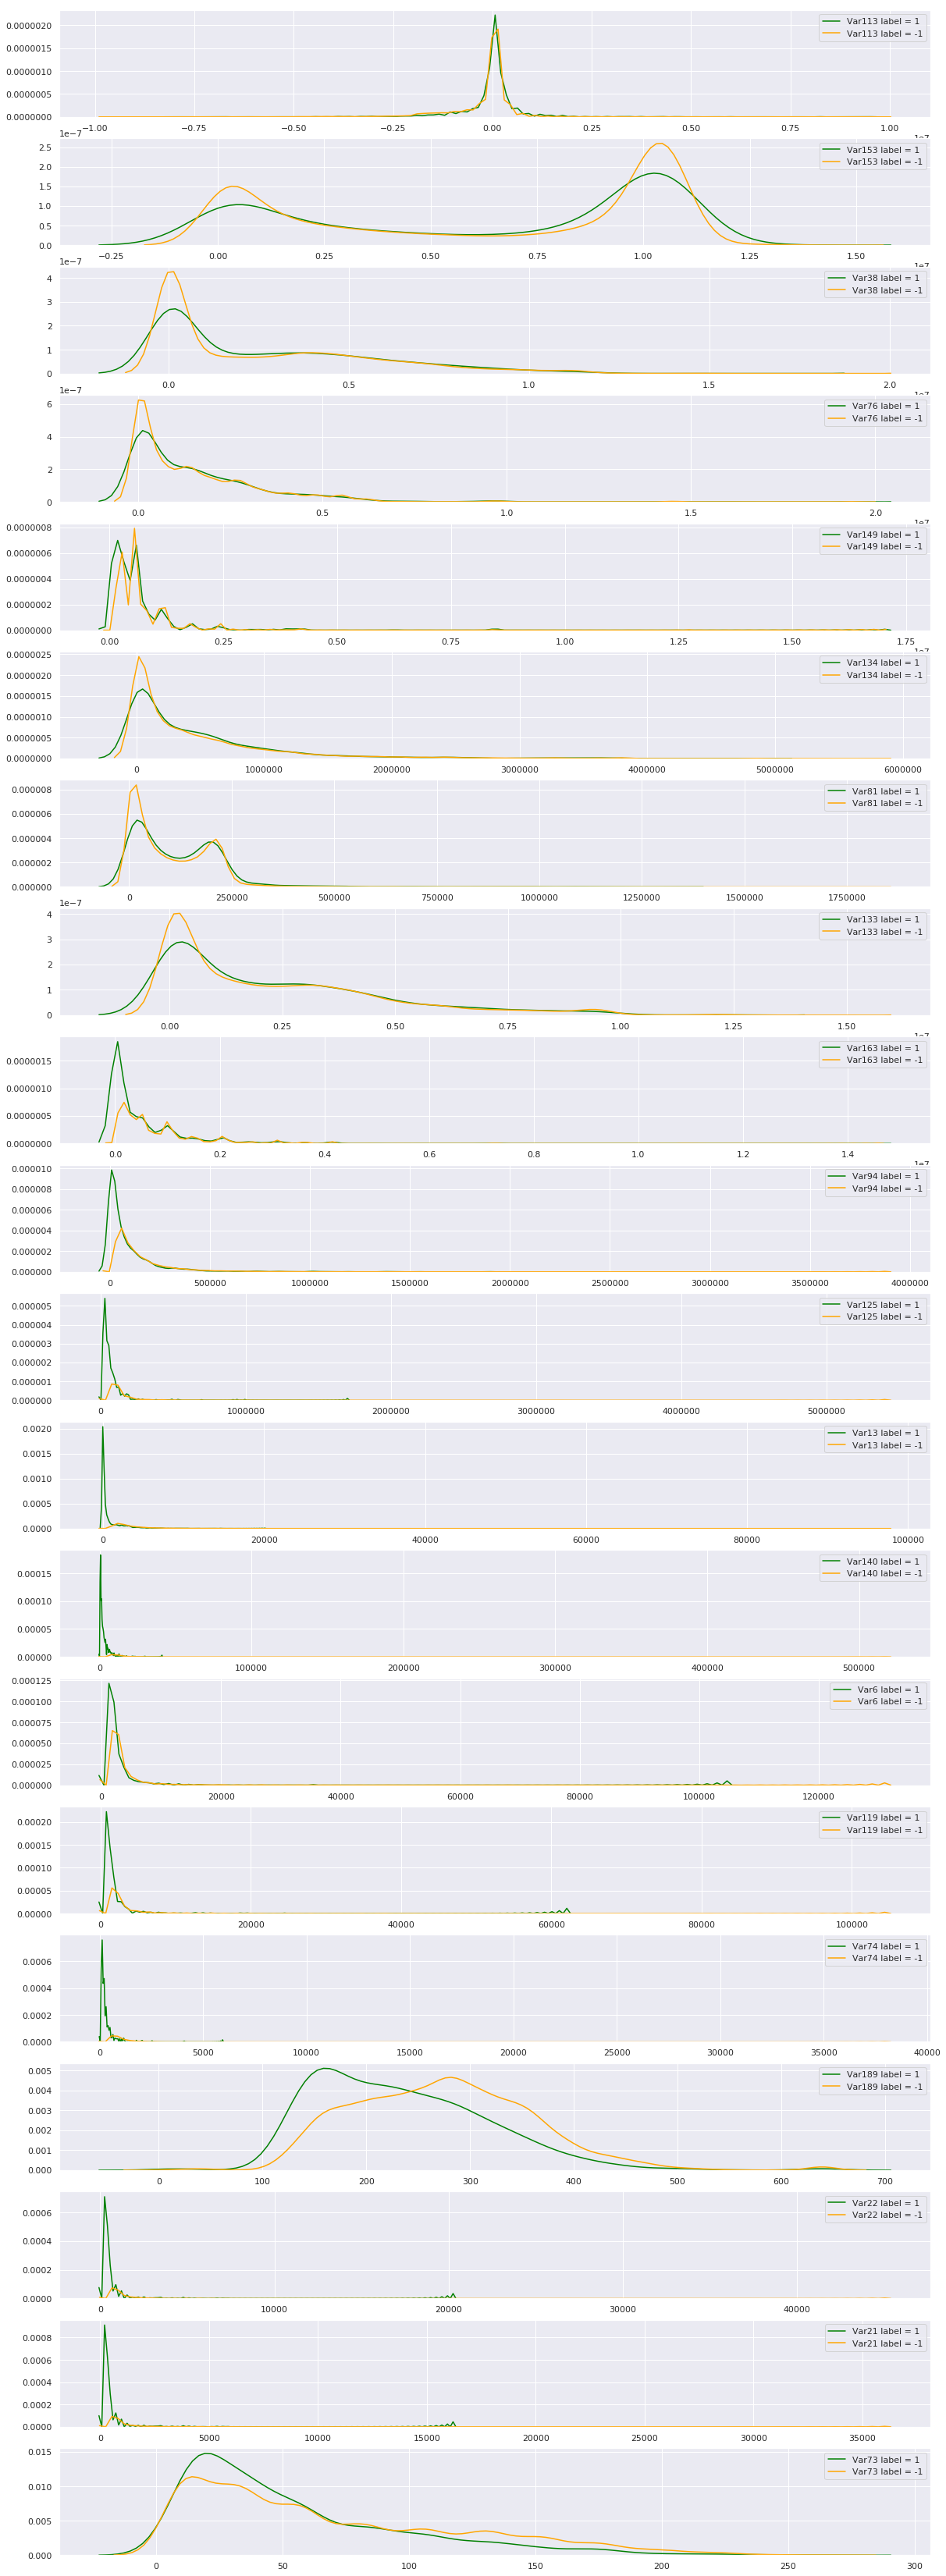

In [60]:
fig, axs = plt.subplots(20, figsize = (20,60))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == 1], ax = ax, color = "green", label = str(column)+" label = 1")
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == -1], ax = ax, color = "orange", label = str(column)+" label = -1")

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [61]:
np.random.RandomState(42)
random_features = np.random.randint(40, size = 10)
columns = correlations.iloc[random_features, 0]
columns[len(columns)] = ("labels")
columns

1       Var7
2      Var13
21     Var94
36    Var153
3      Var21
9      Var38
16     Var76
33    Var143
4      Var22
4      Var22
10    labels
Name: feature, dtype: object

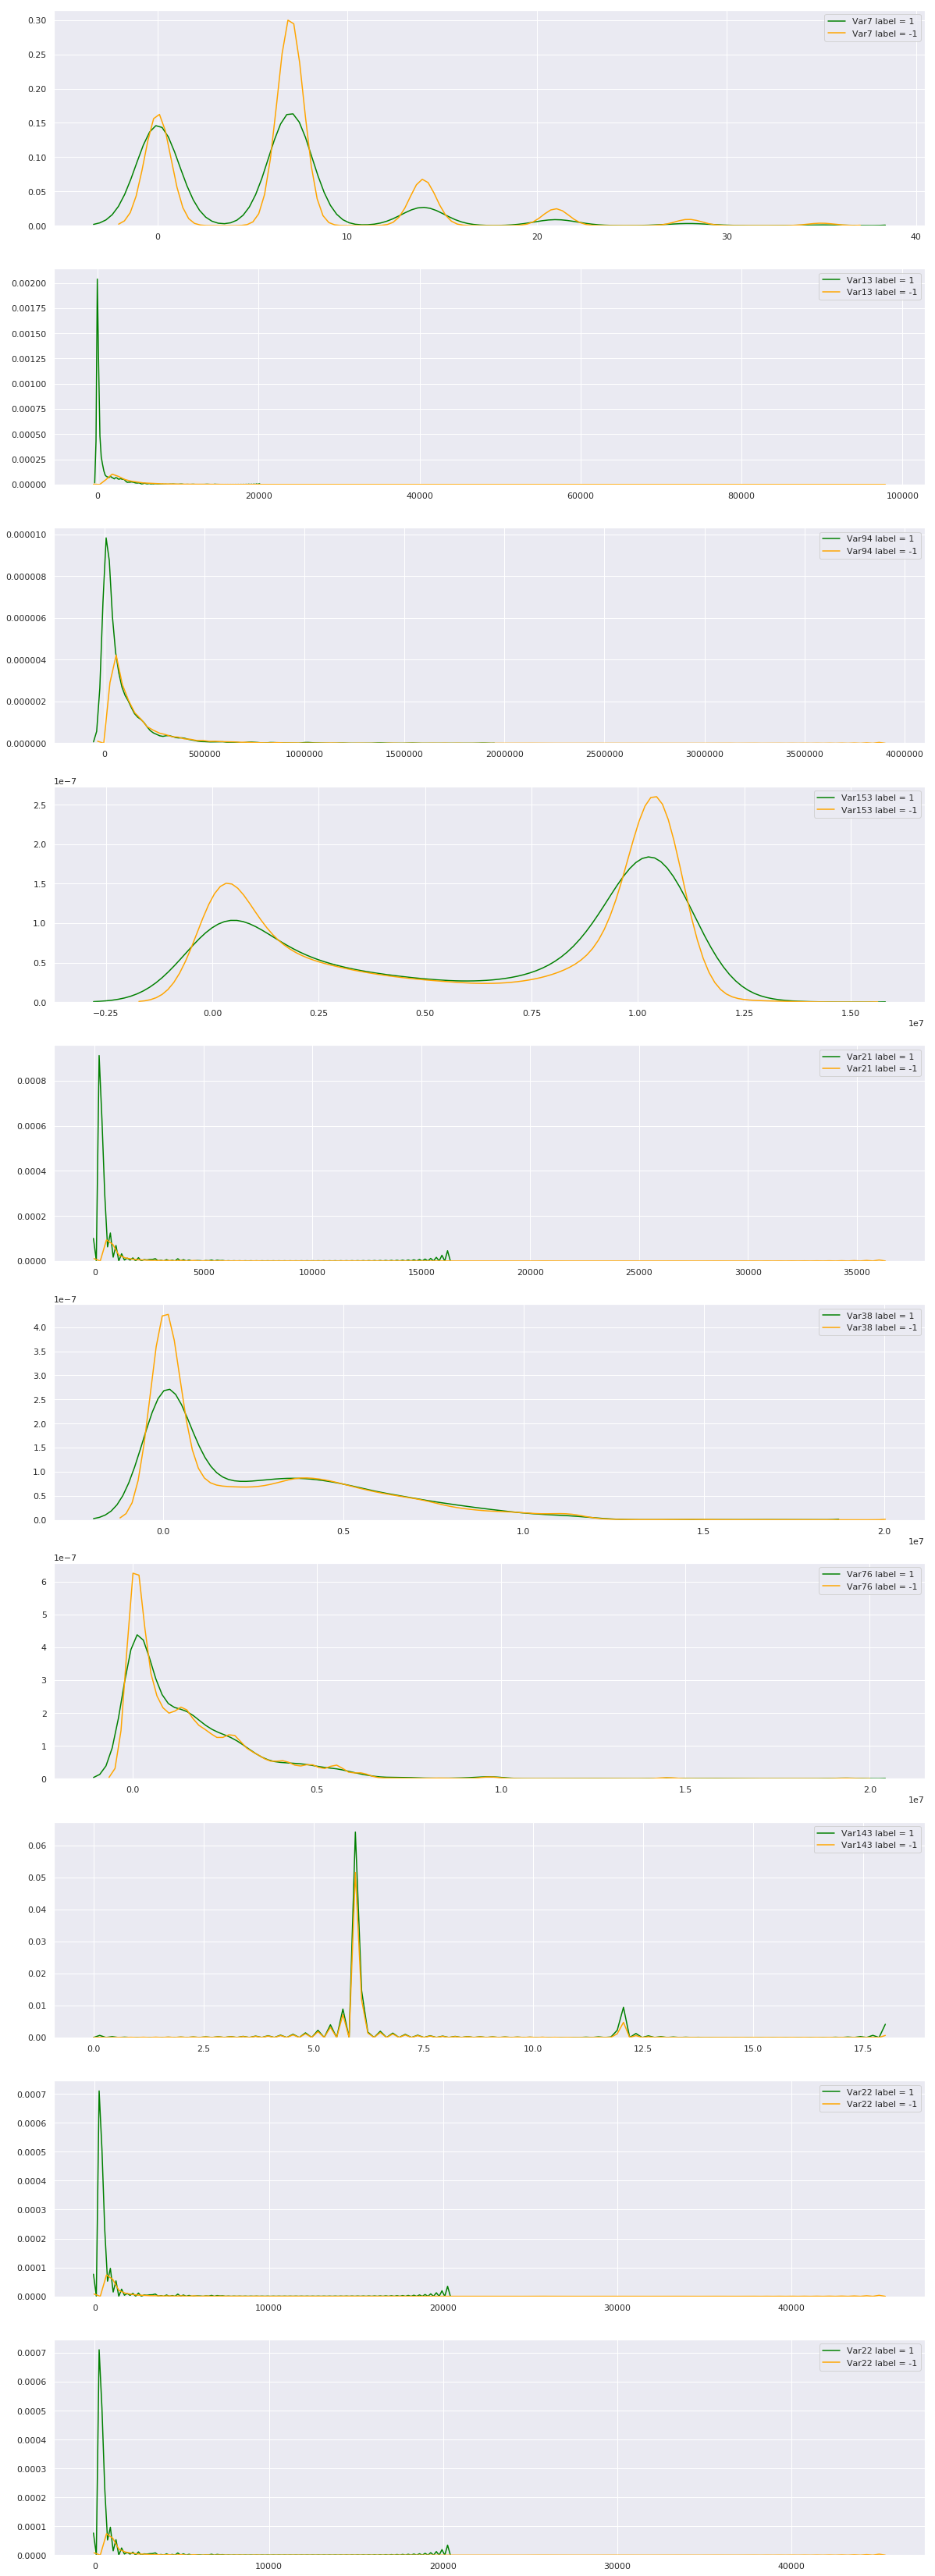

In [62]:
fig, axs = plt.subplots(10, figsize = (20,60))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == 1], ax = ax, color = "green", label = str(column)+" label = 1")
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == -1], ax = ax, color = "orange", label = str(column)+" label = -1")

ValueError: ignored

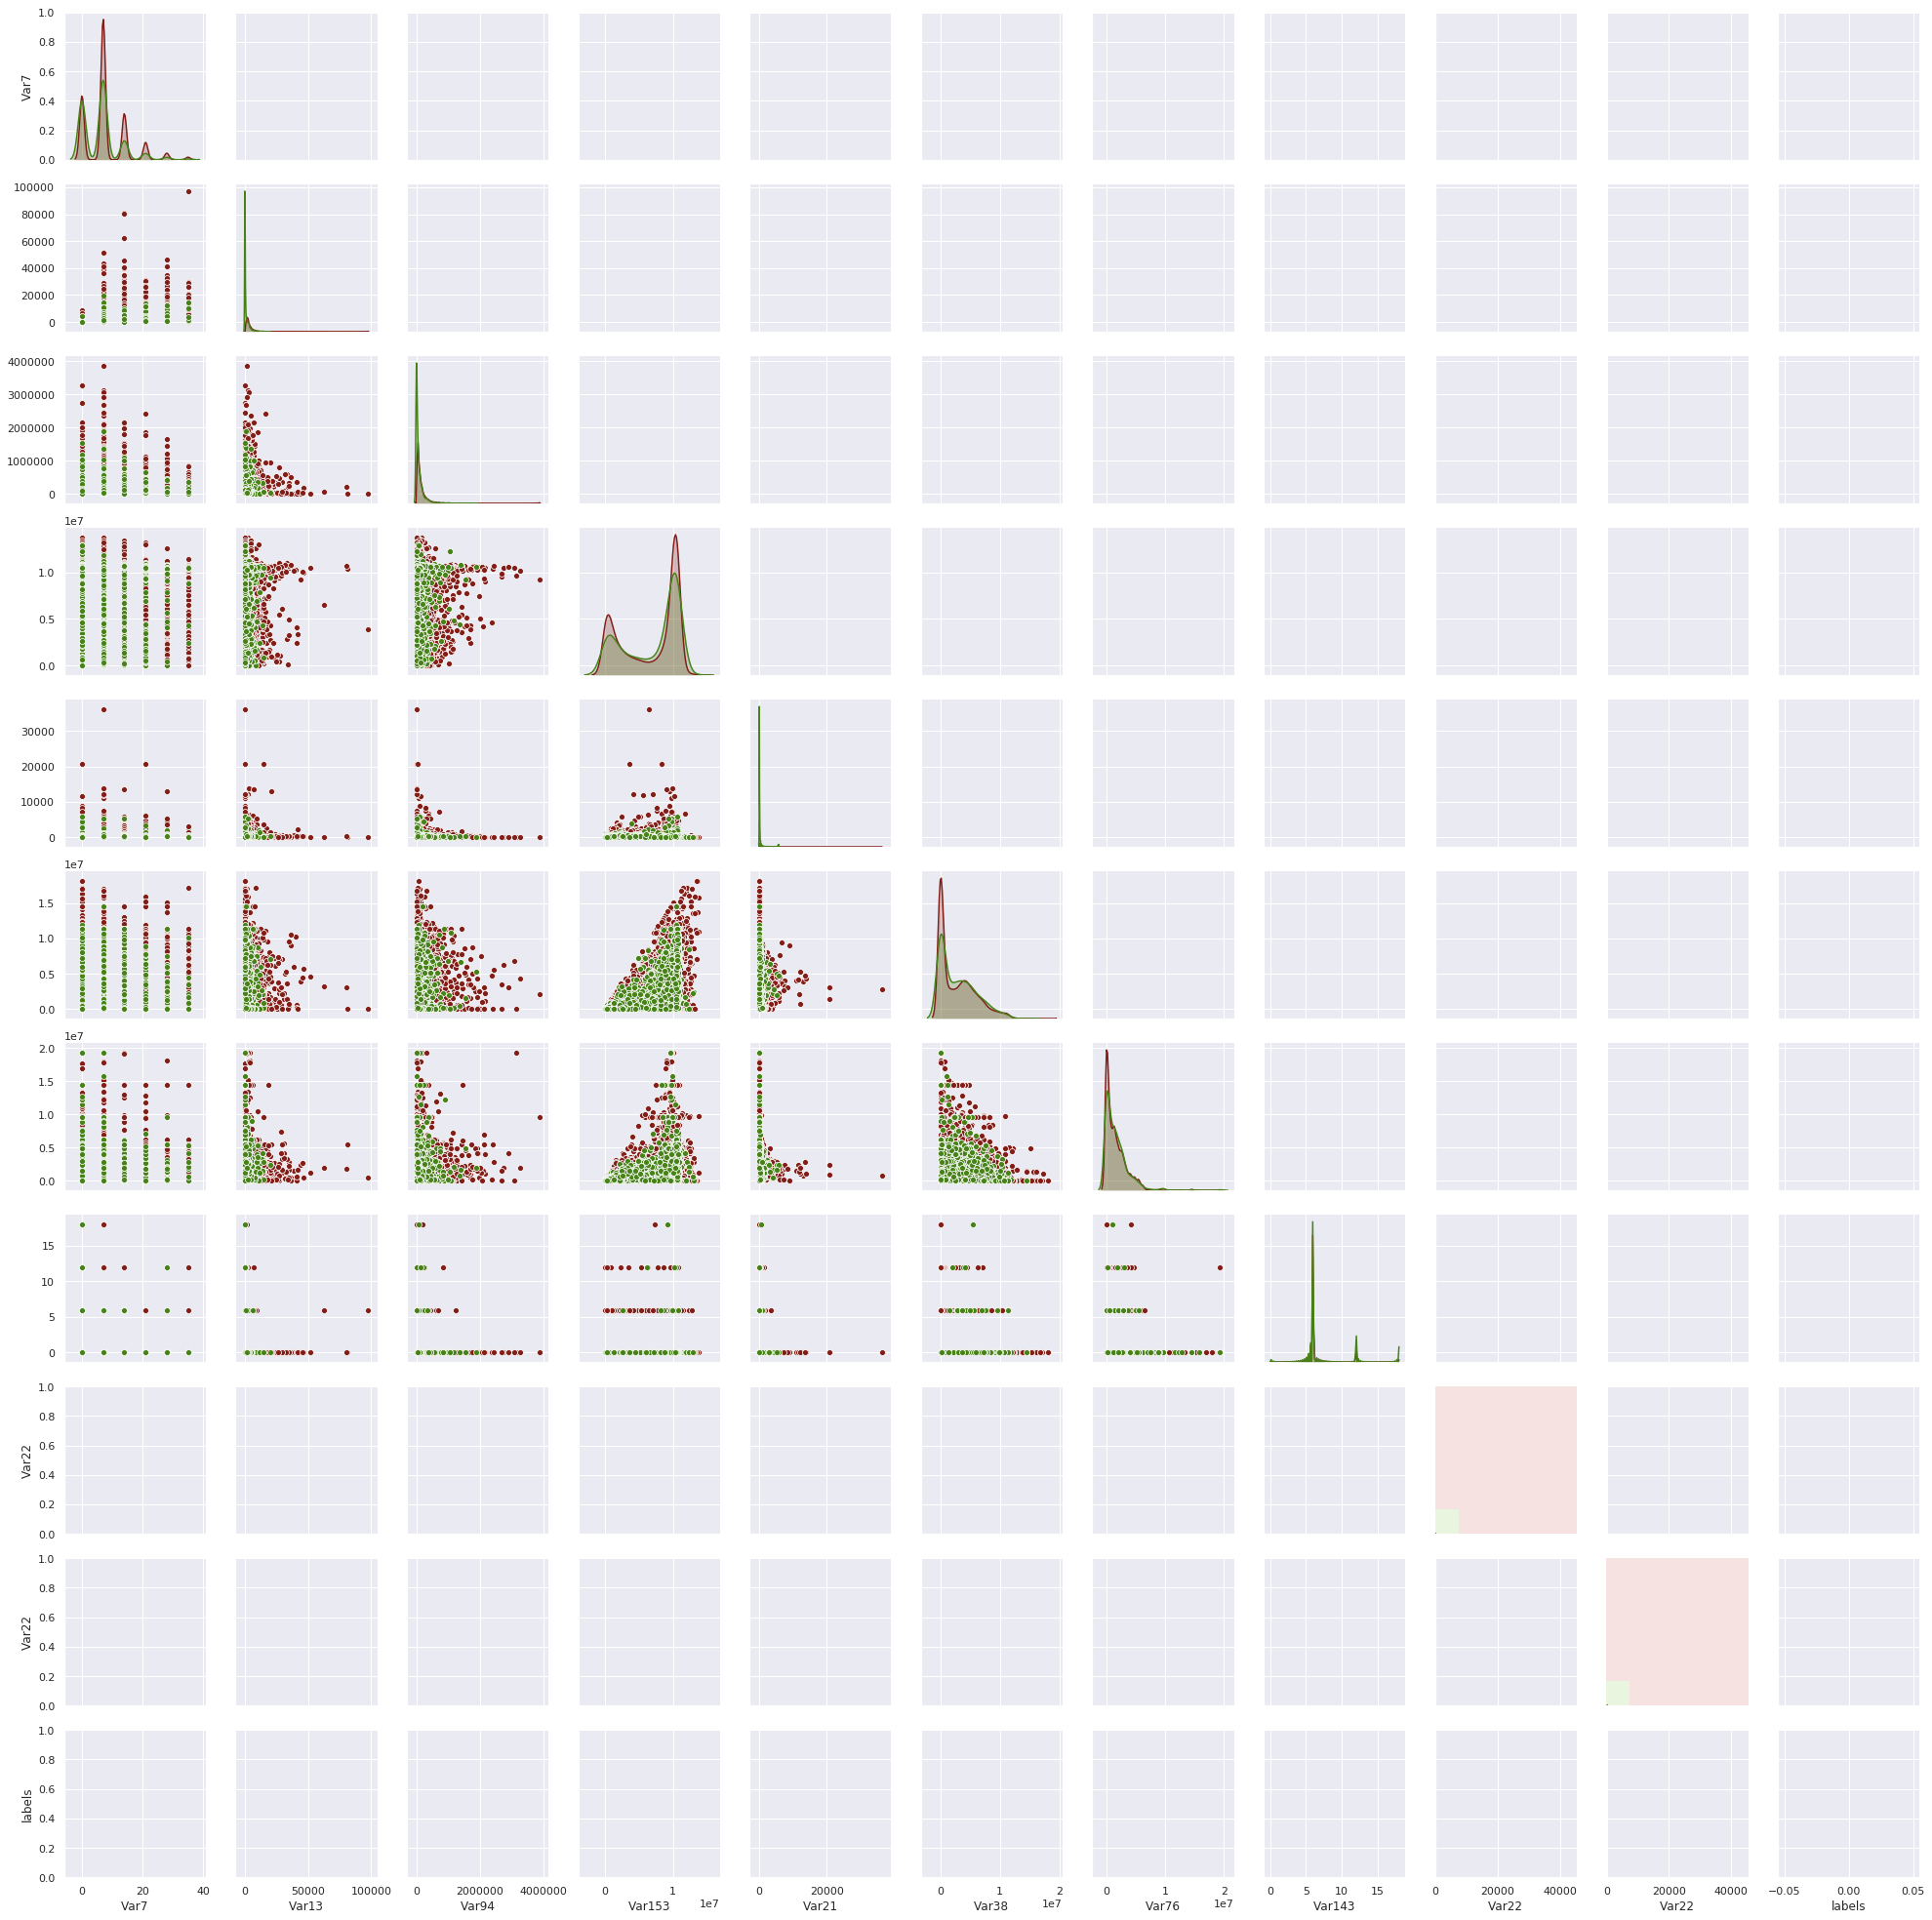

In [64]:
sns_plot = sns.pairplot(numeric_data[columns].dropna(), hue="labels",palette = sns.hls_palette(4, l=.3, s=.7))

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

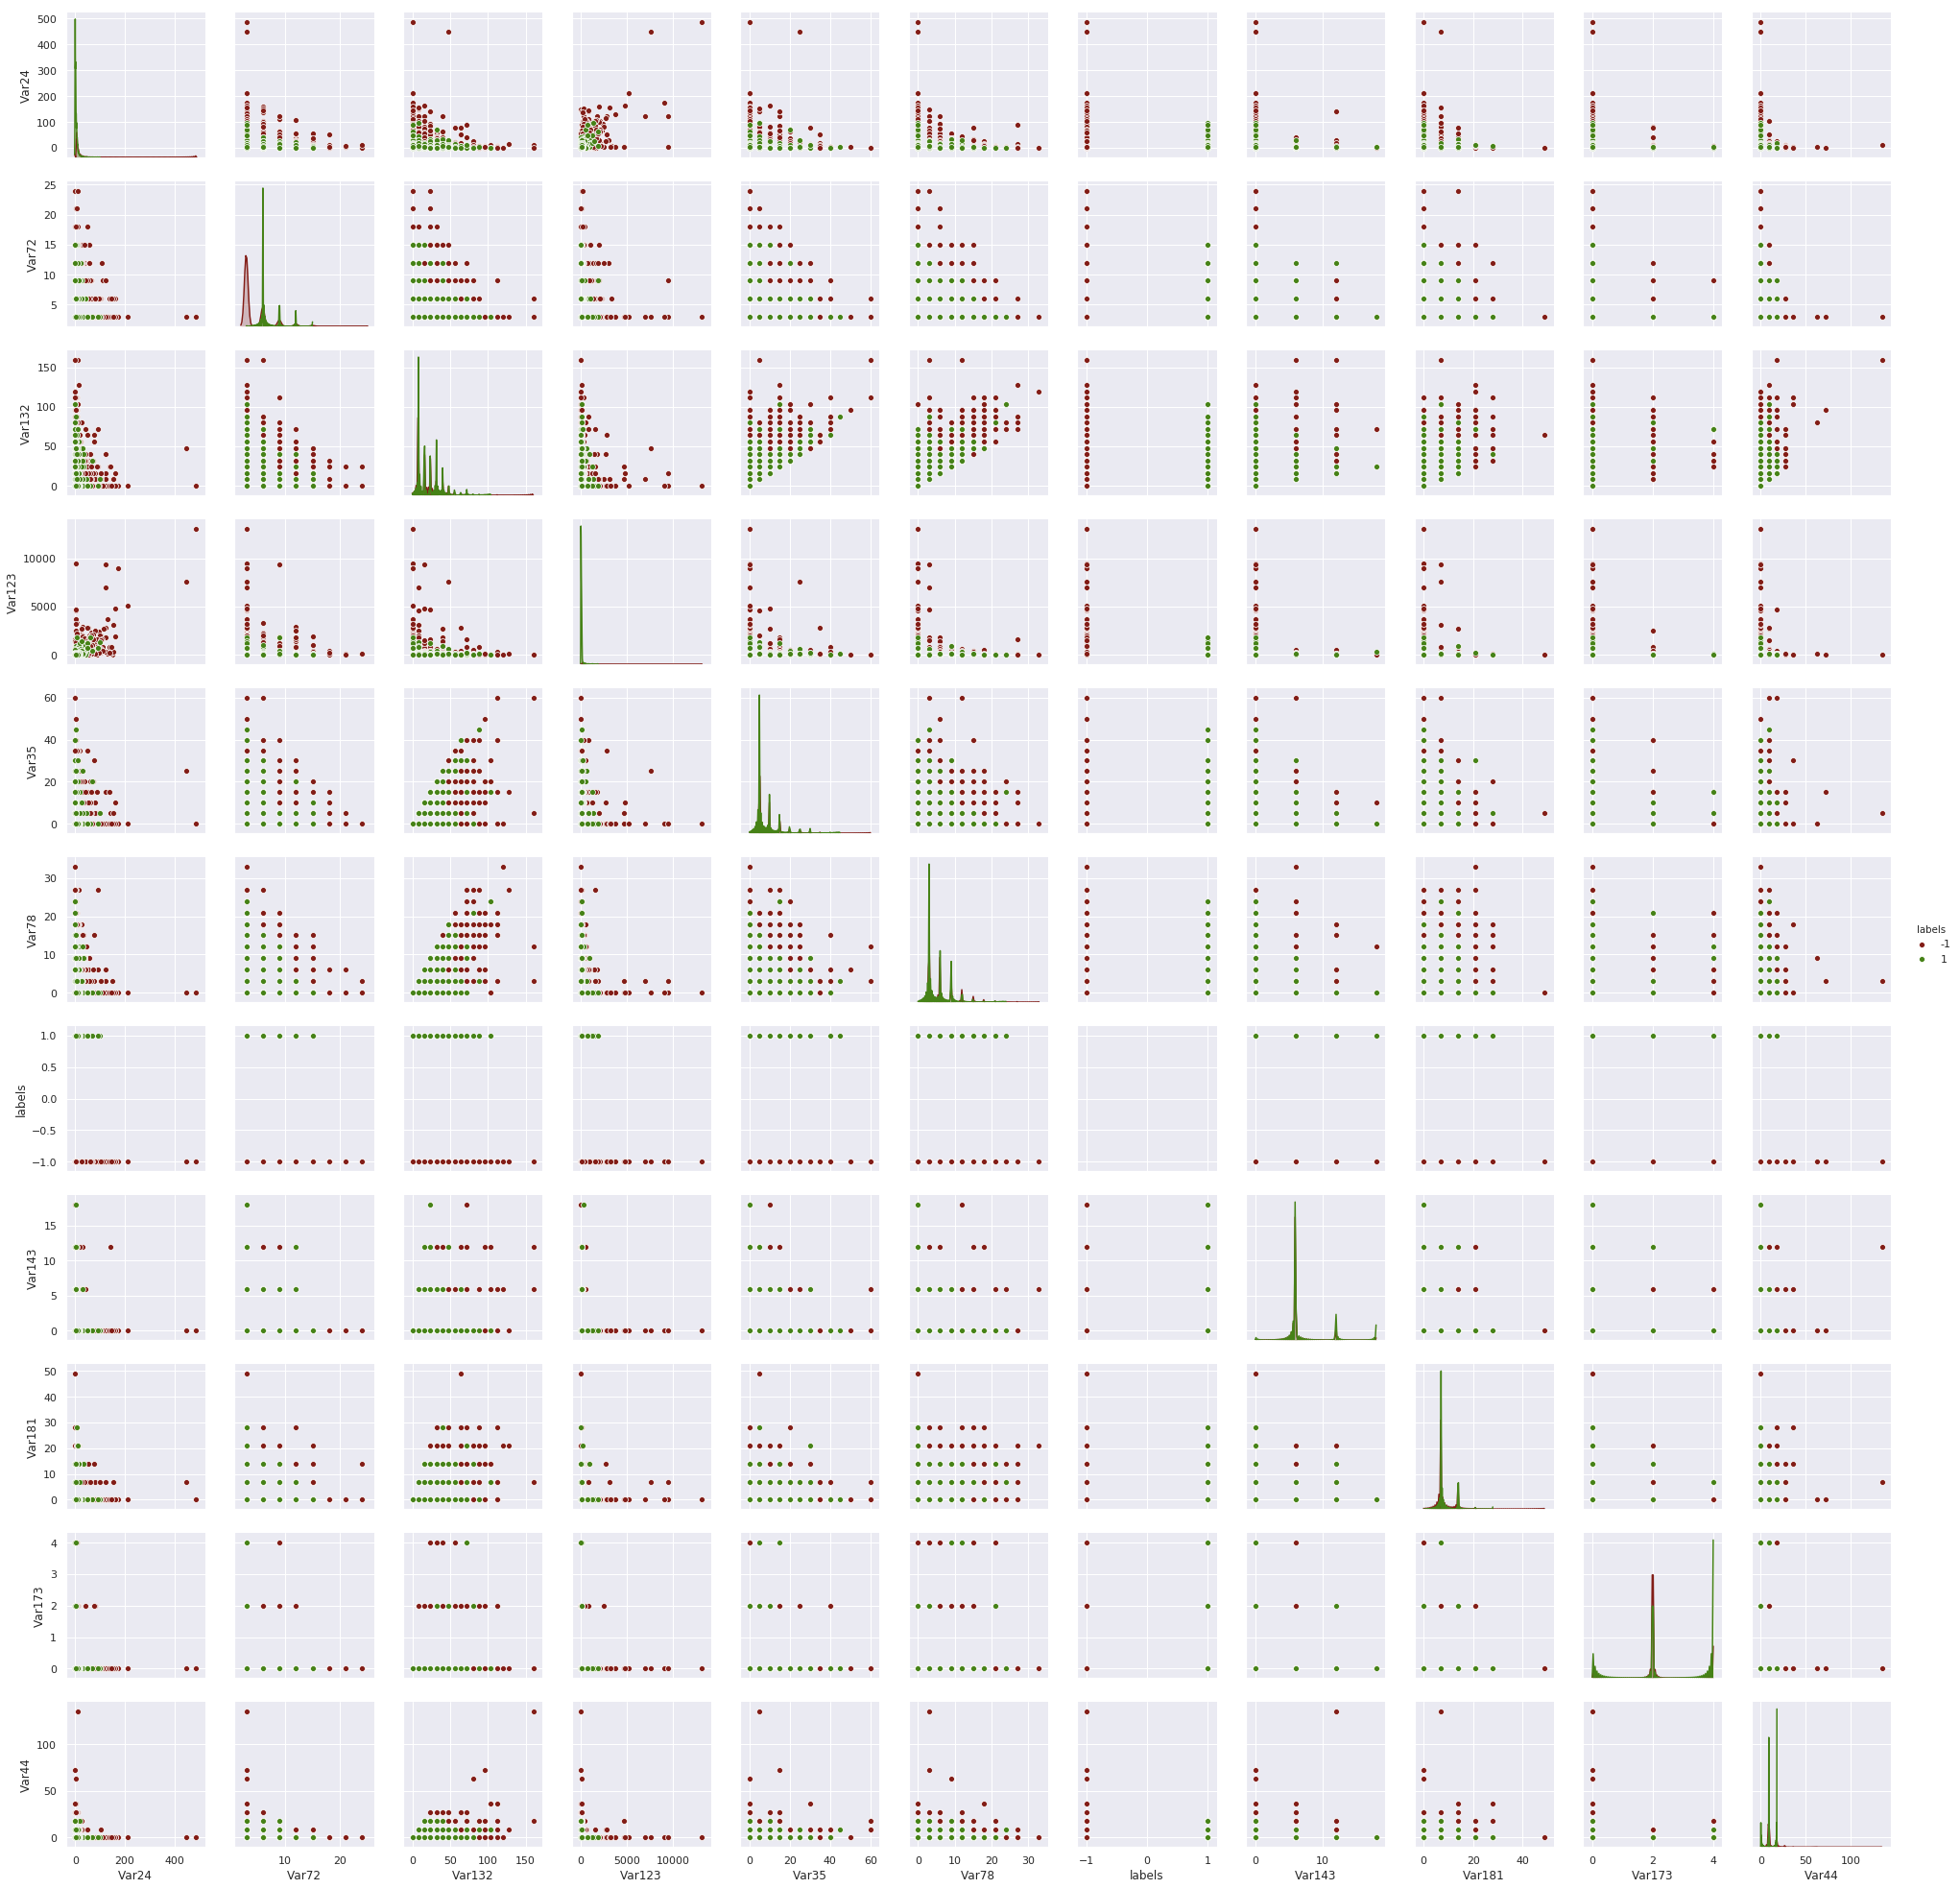

In [65]:
columns = correlations.feature.iloc[len(correlations)-11:]
columns[len(columns)] = ("labels")
sns_plot = sns.pairplot(numeric_data[columns].dropna(), hue="labels",palette = sns.hls_palette(4, l=.3, s=.7))

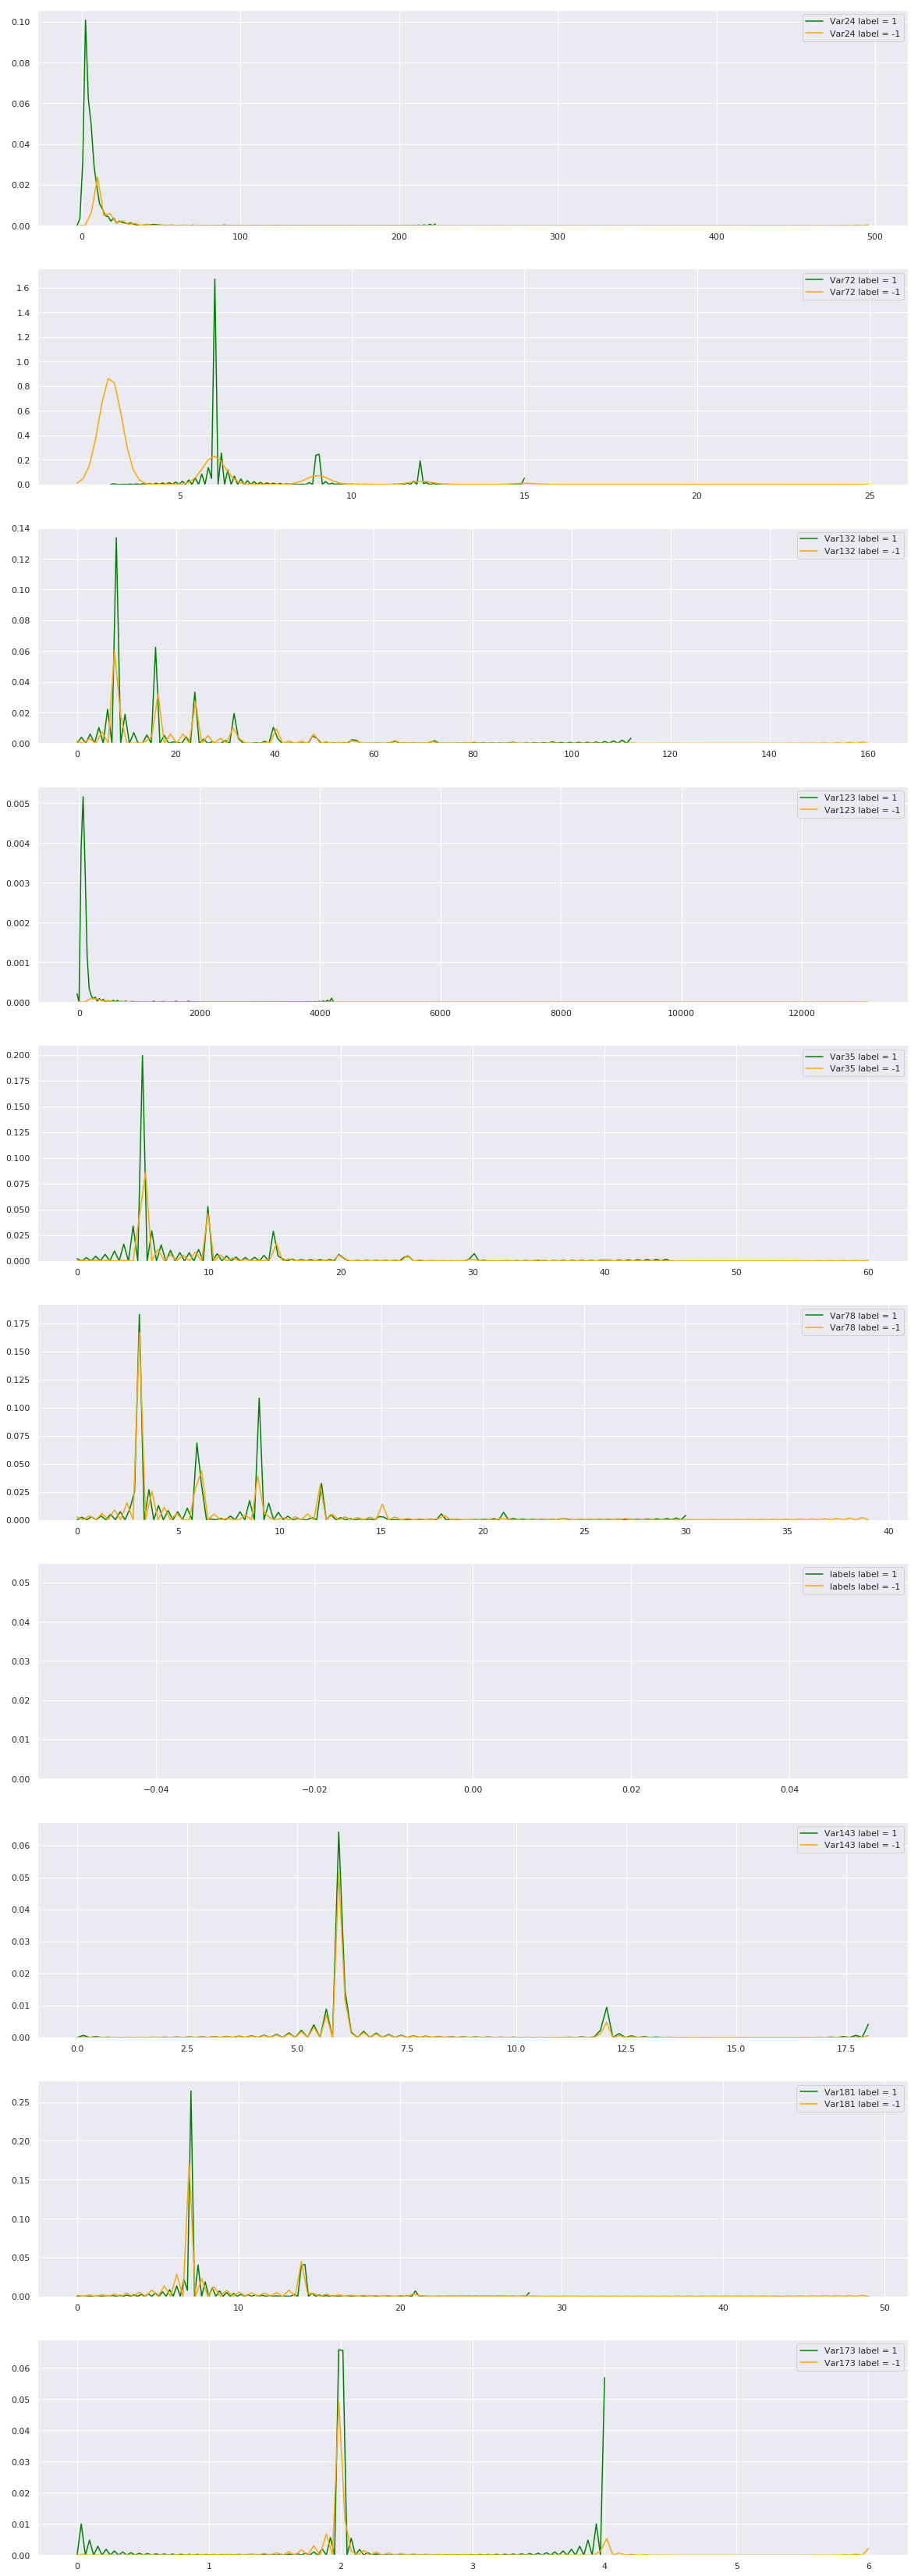

In [66]:
fig, axs = plt.subplots(10, figsize = (20,60))
sns.set(color_codes=True)
for ax, column in zip(axs, columns):
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == 1], ax = ax, color = "green", label = str(column)+" label = 1")
    sns.kdeplot(numeric_data[column][numeric_data['labels'] == -1], ax = ax, color = "orange", label = str(column)+" label = -1")

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

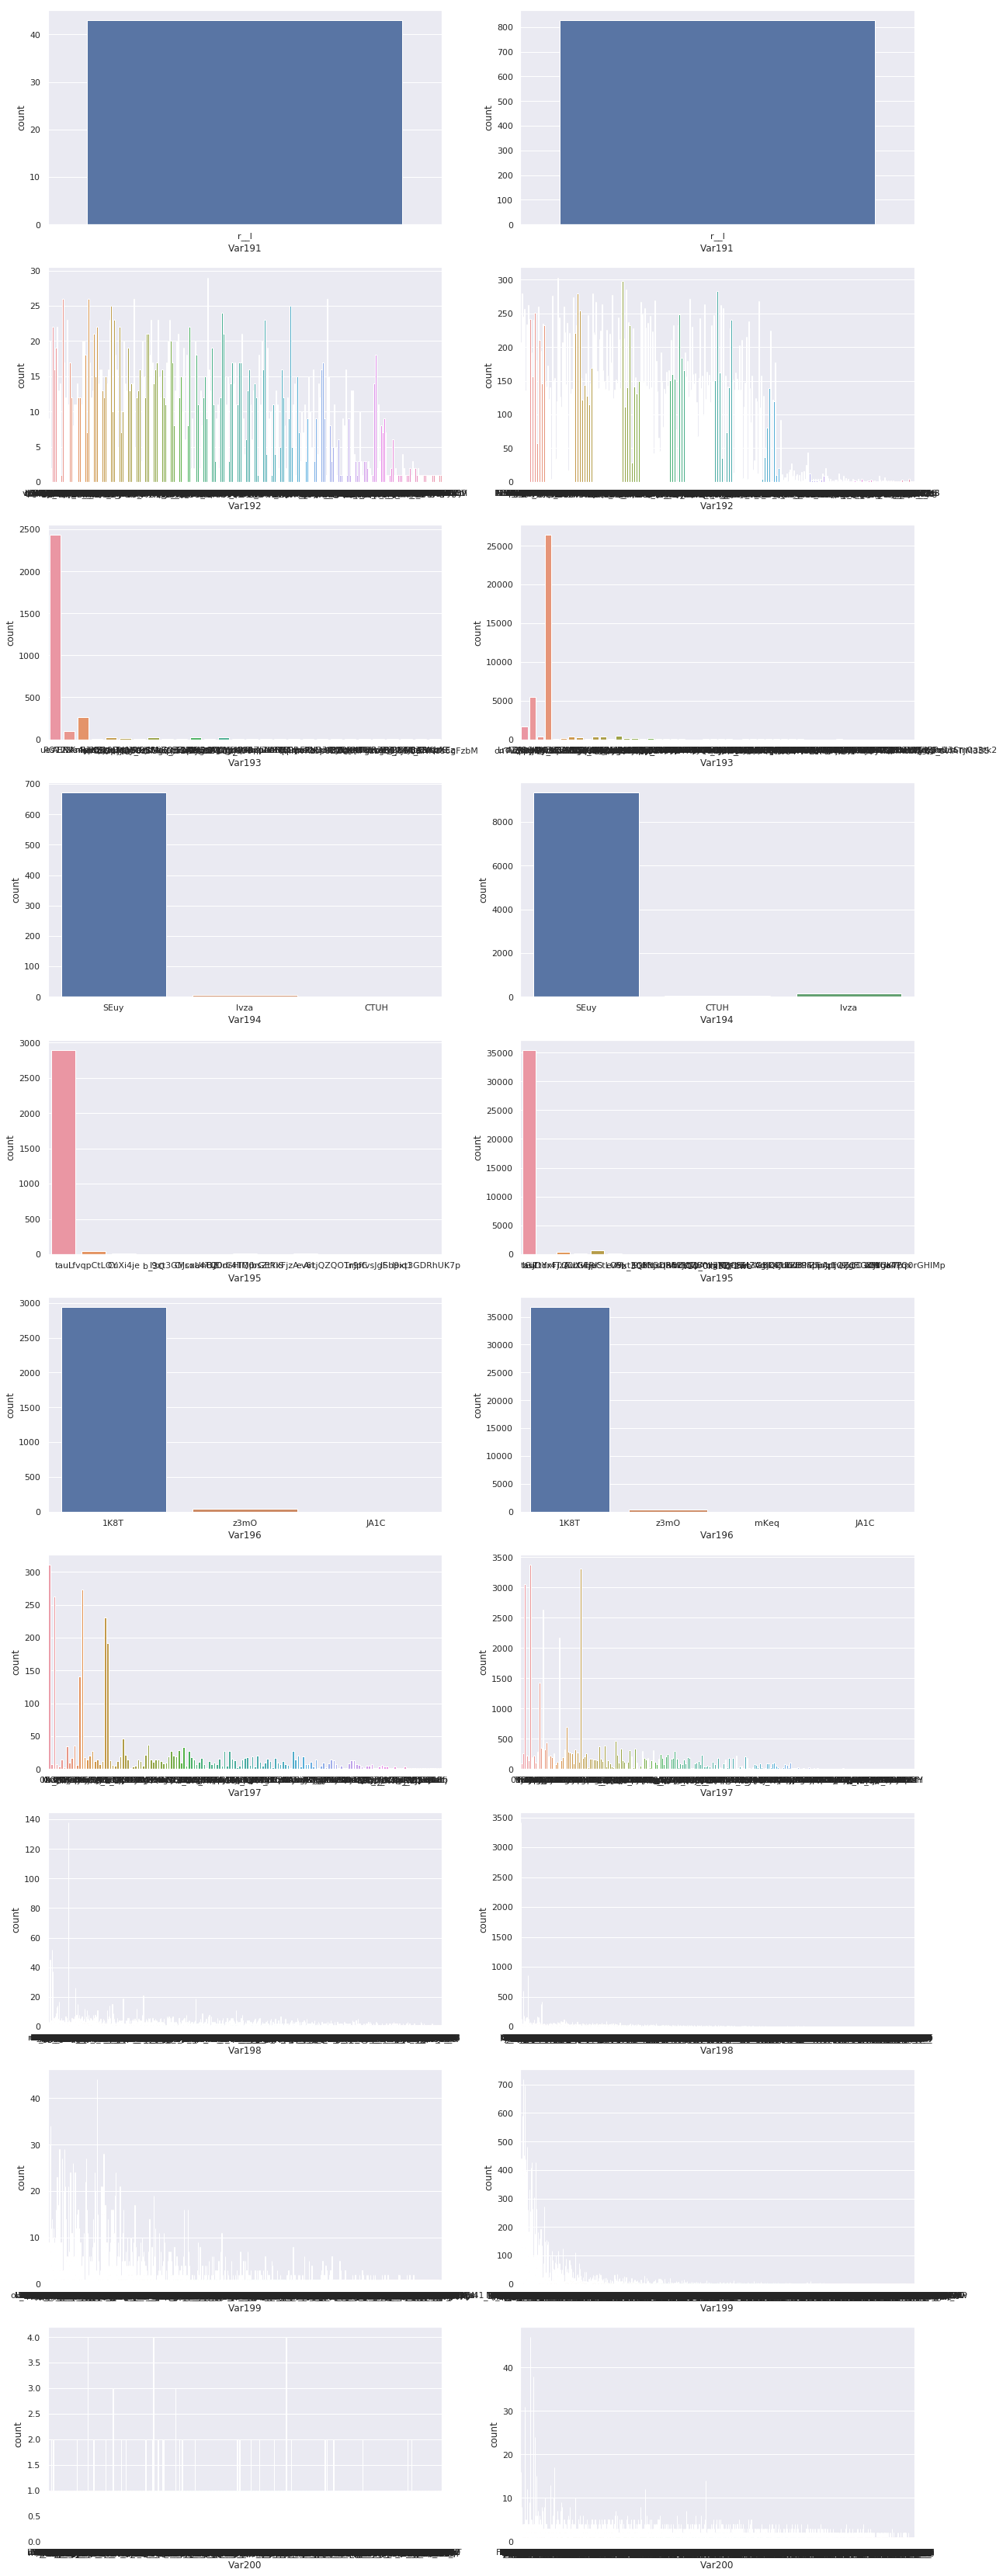

In [67]:
fig, axs = plt.subplots(10,2, figsize = (20,60))
for y in range(10):
    sns.countplot(categorical_data.iloc[:, y][categorical_data['labels'] == 1], ax = axs[y,0])
    sns.countplot(categorical_data.iloc[:, y][categorical_data['labels'] == -1], ax = axs[y,1])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

1. Очень много пропусков в некоторых признаках. 
2. Самый большой вес будет у признаков с наименьшим количеством пропусков.Например Var160, Var74, Var85, Var73.
3. Числовые переменные с большим количеством пропусков и многие категориальные признаки.
4. Конечно!